SEGMENTACIJA SLIKE

Podela slike u smislene strukture, segmentacija slike, često je suštinski korak u analizi slike, predstavljanju objekta, vizuelizaciji, kao i mnogim drugim zadacima tokom obrade slike. Cilj segmentacije je da se pojednostavi i/ili promeni predstava slike u nešto što bi bilo smislenije i lakše za analizu. Tehnike za segmentaciju lociraju objekte koji se sastoje od piksela koji imaju nešto zajedničko. Najčešće to znači da su pikseli sa gotovo istim intenzitetom vrednosti grupisani zajedno, ili pikseli sa bojom istog koda.

Segmentacija slike se često definiše kao proces koji deli sliku na njene sastavne delove i izvlači delove (objekte) od interesa. To je jedan od najkritičnijih zadataka u automatskoj analizi slike, jer će rezultati segmentacije uticati na sve naredne procese analize slike, kao što su reprezentacija i opis objekta, merenje odlika pa čak i zadataka višeg nivoa, kao što su klasifikacija objekta i interpretacija scene.

METODE SEGMENTACIJE
Kada se govori o osnovnoj podeli, izdvajaju se dve najčešće korištene tehnike: pronalaženje ivica – izdvajanje samo onih piksela koji pripadaju rubovima objekata, i izdvajanje regiona – izdvajanje cijelog objekta od pozadine pridružujući piksele čija je svetlost ispod nekog praga pozadini, a ostale objektu i obrnuto.

1. Segmentacija pragom
Segmentacija pomoću praga predstavlja grupu metoda zasnovanih na poređenju osvetljenosti piksela sa jednim ili više pragova, pa u tom slučaju imamo segmentaciju sa jednim i segmentaciju sa više pragova. Ukoliko imamo slike u boji tada se vrši poređenje boje između piksela. Segmentacija sa jednim pragom predstavlja najjednostavniji vid segmentacije i njegova osnovna primena je za odvajanje objekta od pozadine, ukoliko pozadina ima uniformnu osvjetljenost (boju) koja se razlikuje od objekta. Ovakav način segmentacije se može primjeniti, npr., kod izdvajanja pisanog ili štampanog teksta, analize nekih biomedicinskih slika, prepoznavanja tipa aviona koji leti, itd. Segmentacija sa više pragova je metoda koju je pogodno koristiti u slučaju kada imamo scene sa više različitih objekata.

2. Segmentacija klasterizacijom
Segmentacija pomoću klasterizacije je jedna od najstarijih tehnika segmentacije, s obzirom da se može koristiti za segmentaciju sivih i kolor slika. Za vektor x=[x1, x2,…,xN] T koji predstavlja merenja karakteristika jednog piksela slike, merene veličine mogu biti tri komponente boje piksela, ili neka druga obeležja izračunata u malom prozoru oko posmatranog piksela. Postupak segmentacije se u tom slučaju sastoji od podjele N–dimenzionalnog prostora u uzajamno isključive oblasti, pri čemu svaka ta oblast obuhvata grupu podataka koja se odnosi na jedan region slike.

3. Segmentacija regionom
Segmentacija pomoću regiona predstavlja skup metoda koje pokušavaju da izdvoje područja slike koja su homogena sa gledišta određenih karakteristika. U ovu grupu spadaju: segmentacija pomoću rasta regiona i segmentacija pomoću razdvajanja i spajanja regiona. Osnovna ideja segmentacije pomoću rasta regiona je da se izvrši grupisanje susednih piksela sličnih osvjetljenosti (boja), na osnovu čega se formiraju regioni. Kod segmentacije pomoću razdvajanja i spajanja regiona, slika se deli na četiri kvadranta, nakon čega se ispituje da li su dobijeni podsegmenti uniformni po obeležju na osnovu kojeg se vrši segmentacija.

4. Segmentacija granicom regiona
Metode koje vrše izdvajanje ivica generišu isprekidane granice objekata a ne zatvorene krive. Zbog toga se u procesu segmentacije koji koristi ivice mora primeniti i neki postupak za spajanje ivica, kako bi se formirale neprekidne granice regiona. U tu svrhu se mogu koristiti: metoda spajanja ivica fitovanjem krive, spajanje ivica heurističkim metodama i spajanje ivica Hafovom transformacijom.


CNN (Convolutional Neural Network ili konvolutivna neuronska mreža) je vrsta neuronske mreže posebno dizajnirana za obradu podataka koji imaju prostornu strukturu, poput slika. CNN-ovi su široko korišćeni u zadacima vezanim za obradu slika, prepoznavanje objekata, segmentaciju slika, prepoznavanje lica, itd.

U-net je posebna arhitektura neuronske mreže koja je originalno razvijena za zadatke semantičke segmentacije slika, a kasnije se proširila na razne druge zadatke u obradi slika i medicinskom segmentiranju. Ova arhitektura dobija ime po obliku njene dijagrama koji podseća na slovo "U".
Glavne karakteristike U-net mreže su:
1.	Smanjenje i Proširivanje (Downsampling and Upsampling): U-net koristi kontraktne putanje za smanjenje dimenzionalnosti slika (downsampling) putem konvolucionih slojeva i slojeva za maksimalno uzorkovanje (pooling), a zatim koristi ekspandirajuće putanje za vraćanje originalne dimenzionalnosti (upsampling) putem konvolucionih slojeva i slojeva za konvolucioni transponat (deconvolutional layers).
2.	Kraći put (Shortcuts): U-net uključuje veze kraćeg puta (shortcut connections) između kontraktne i ekspandirajuće putanje. Ovo omogućava informacijama iz kontraktne putanje da se direktno proslede ekspandirajućoj putanji, pomažući u očuvanju detalja koji se često gube tokom procesa downsampling-a.
3.	Konkatenacija putanja: Umesto da samo koristi izlaze ekspandirajuće putanje, U-net kombinuje te izlaze sa odgovarajućim izlazima kontraktne putanje koristeći konkatenaciju, čime se obezbeđuje bogatiji skup informacija za predikciju.
4.	Aktivacija na Izlazu: Tipično, U-net završava sa slojem aktivacije na izlazu koji se koristi za generisanje segmentacione mape.


Importovanje biblioteka potrebnih za rad i povezivanje na Google drive

In [ ]:
import os
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Učitavanje slika potrebnih za rad

In [ ]:
DATA_PATH = '/content/gdrive/MyDrive/google colab/Breast_Ultrasound_Images_Dataset.zip'

In [ ]:
!unzip '/content/gdrive/MyDrive/google colab/Breast_Ultrasound_Images_Dataset.zip'

Archive:  /content/gdrive/MyDrive/google colab/Breast_Ultrasound_Images_Dataset.zip
  inflating: Dataset_BUSI_with_GT/benign/benign (1).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (1)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104).png  
  inflating: Dataset_BUSI_with_GT/benign/beni

Funkcija img_to_array koristi se za konvertovanje slike u NumPy niz.

In [ ]:
from keras.preprocessing.image import img_to_array

In [ ]:
def num (image) :
    val = 0

    for i in range(len(image)) :
        if image[i] == '(' :
            while True :
                i += 1
                if image[i] == ')' :
                    break
                val = (val*10) + int(image[i])
            break

    return val

In [ ]:
# initialize cancer samples to numpy arrays
X_b, y_b = np.zeros((437, 128, 128, 1)), np.zeros((437, 128, 128, 1))
X_n, y_n = np.zeros((133, 128, 128, 1)), np.zeros((133, 128, 128, 1))
X_m, y_m = np.zeros((210, 128, 128, 1)), np.zeros((210, 128, 128, 1))

In [ ]:
path = '/content/Dataset_BUSI_with_GT/'

U svakom poddirektorijumu, petlja prolazi kroz slike i čita ih koristeći OpenCV funkciju cv2.imread sa opcijom cv2.IMREAD_GRAYSCALE, što znači da slike čita kao crno-bele slike.
Zatim, u zavisnosti od imena slike, slika se dodaje određenom setu podataka (X_b, X_n, X_m za ulazne slike, y_b, y_n, y_m za izlazne slike)

In [ ]:
for i, tumor_type in enumerate(os.listdir(path)) :
    for image in os.listdir(path+tumor_type+'/') :
        p = os.path.join(path+tumor_type, image)
        img = cv2.imread(p,cv2.IMREAD_GRAYSCALE)           # read image as  grayscale

        if image[-5] == ')' :

            img = cv2.resize(img,(128,128))
            pil_img = Image.fromarray (img)

            if image[0] == 'b' :
                X_b[num(image)-1]+= img_to_array(pil_img)  # If image is real add it
            if image[0] == 'n' :                           # to X as benign , normal
                X_n[num(image)-1]+= img_to_array(pil_img)  # or malignant.
            if image[0] == 'm' :
                X_m[num(image)-1]+= img_to_array(pil_img)
        else :
            img = cv2.resize(img,(128,128))
            pil_img = Image.fromarray (img)

            if image[0] == 'b' :
                y_b[num(image)-1]+= img_to_array(pil_img)  # Similarly add the target
            if image[0] == 'n' :                           # mask to y.
                y_n[num(image)-1]+= img_to_array(pil_img)
            if image[0] == 'm' :
                y_m[num(image)-1]+= img_to_array(pil_img)

Ovaj blok koda koristi matplotlib za prikazivanje pet realnih slika (X_b) i njihovih odgovarajućih maski (y_b).

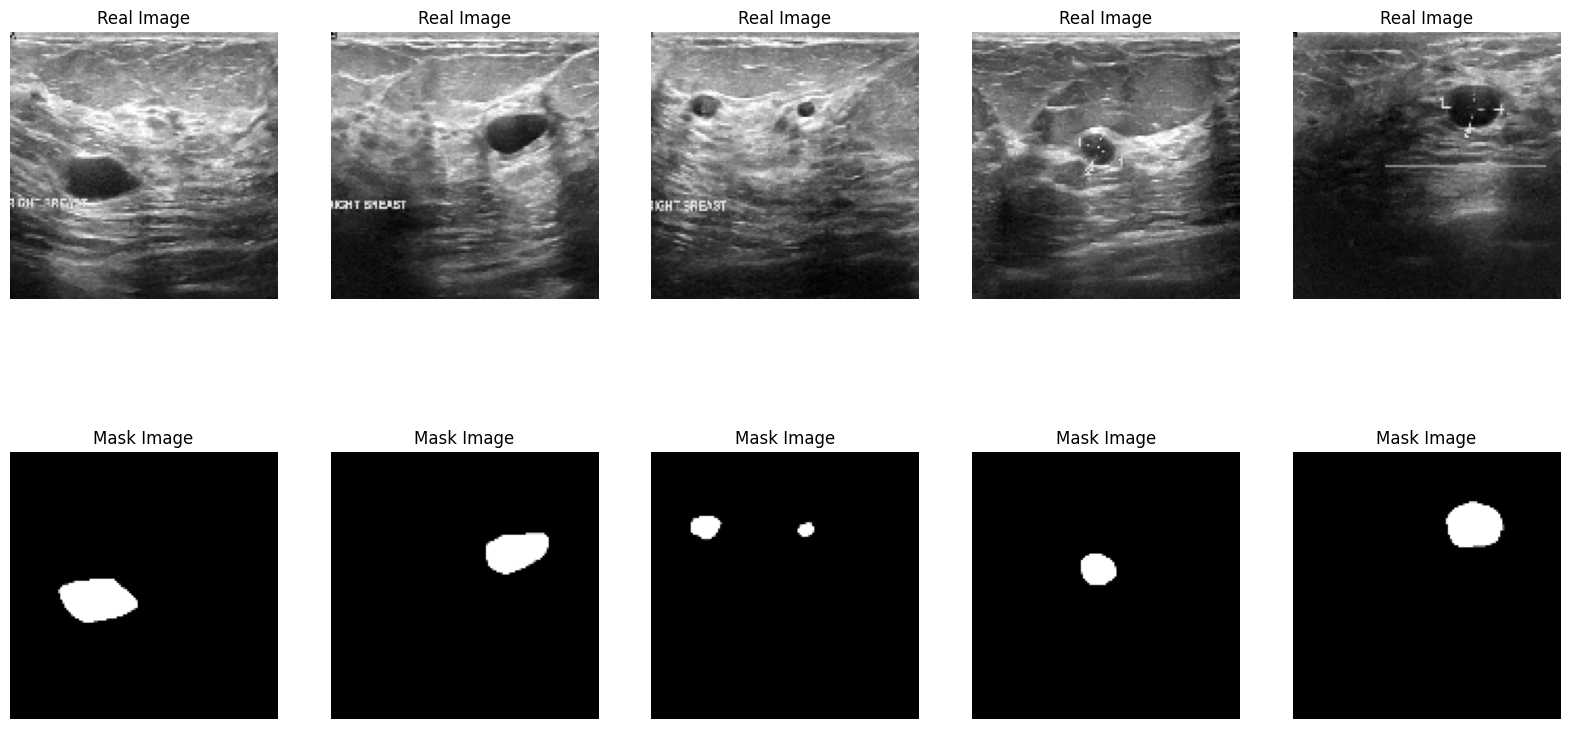

In [ ]:
plt.figure(figsize = (20,10))

for i in range(5) :
    plt.subplot(2,5,i+1)
    plt.imshow(tf.squeeze(X_b[i+1]), 'gray')
    plt.title('Real Image')
    plt.axis('off')

for i in range(5) :
    plt.subplot(2,5,i+6)
    plt.imshow(tf.squeeze(y_b[i+1]), 'gray')
    plt.title('Mask Image')
    plt.axis('off')
plt.show()

Ovaj blok koda koristi funkciju np.concatenate kako bi spojio (konkatenirao) setove podataka X_b, X_n, X_m i y_b, y_n, y_m u jedan veliki set podataka X i y

In [ ]:
# input and target
X = np.concatenate((X_b, X_n, X_m), axis = 0)
y = np.concatenate((y_b, y_n, y_m), axis = 0)

In [ ]:
# normlaize
X /= 255.0
y /= 255.0

In [ ]:
print('Input Shape: ', X.shape)
print('Traget Shape: ', y.shape)

Input Shape:  (780, 128, 128, 1)
Traget Shape:  (780, 128, 128, 1)


In [ ]:
# target shouldnt be > 1
y[y > 1.0] = 1.0

Ovaj blok koda koristi matplotlib za prikazivanje 16 nasumično odabranih parova realnih slika (X) i njihovih odgovarajućih maski (y).

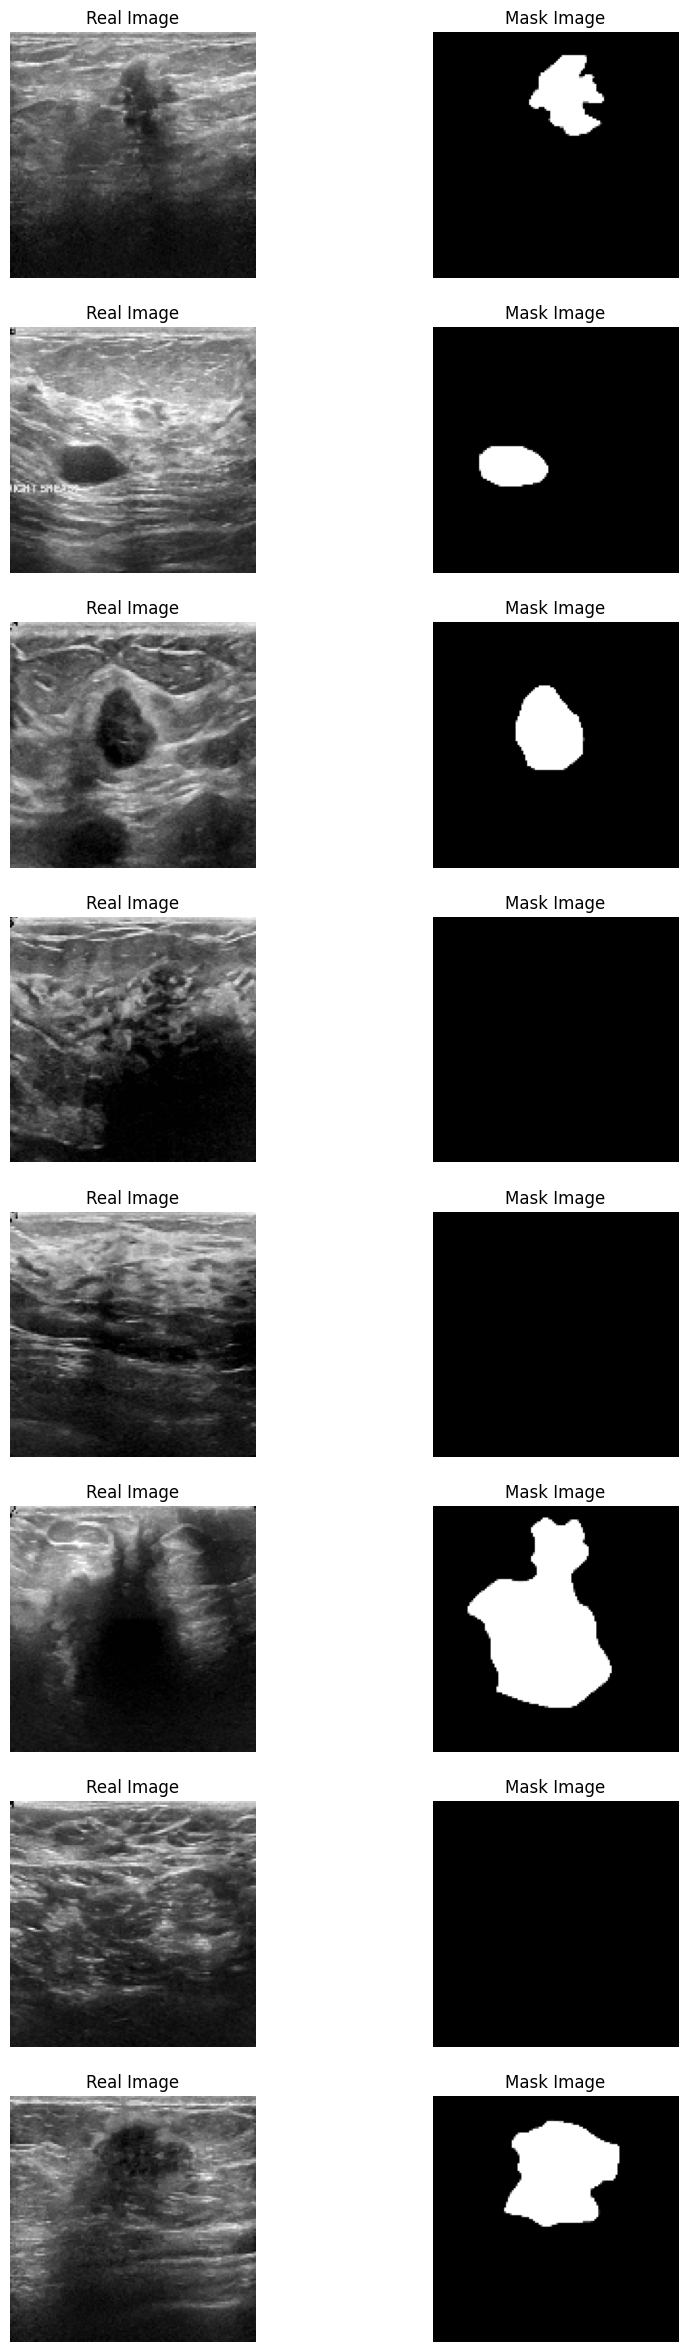

In [ ]:
plt.figure(figsize = (10,30))
i = 0
while i < 16 :

    x = np.random.randint(0,780)

    plt.subplot(8,2,i+1)
    plt.imshow(tf.squeeze(X[x]),'gray')
    plt.title('Real Image')
    plt.axis('off')

    plt.subplot(8,2,i+2)
    plt.imshow(tf.squeeze(y[x]),'gray')
    plt.title('Mask Image')
    plt.axis('off')

    i += 2
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

Delimo podatke na test podatke i podatke za treniranje

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 1)

In [ ]:
print('Number of Training Samples X: ', X_train.shape)
print('Number of Training Samples y: ', y_train.shape)
print('Number of Testing Samples X: ', X_test.shape)
print('Number of Testing Samples y: ', y_test.shape)

Number of Training Samples X:  (741, 128, 128, 1)
Number of Training Samples y:  (741, 128, 128, 1)
Number of Testing Samples X:  (39, 128, 128, 1)
Number of Testing Samples y:  (39, 128, 128, 1)


In [ ]:
import keras
from keras.models import Model
from keras.layers import Conv2D, UpSampling2D, MaxPooling2D, Dropout, Cropping2D, Input, Concatenate, Conv2DTranspose
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard

Ovaj kod definiše U-net arhitekturu modela za segmentaciju slika. Ovaj tip modela često se koristi u medicinskoj obradi slika i drugim aplikacijama gde je potrebna precizna segmentacija objekata na slici.

In [ ]:
inply = Input((128, 128, 1,))

########## Contracting path ##########
conv1 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(inply)
conv1 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(conv1)
pool1 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv1)
drop1 = Dropout(0.2)(pool1)

conv2 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(drop1)
conv2 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(conv2)
pool2 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv2)
drop2 = Dropout(0.2)(pool2)

conv3 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(drop2)
conv3 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(conv3)
pool3 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv3)
drop3 = Dropout(0.2)(pool3)

conv4 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(drop3)
conv4 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(conv4)
pool4 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv4)
drop4 = Dropout(0.2)(pool4)

########## Bottleneck layer ##########
convm = Conv2D(2**10, (3,3), activation = 'relu', padding = 'same')(drop4)
convm = Conv2D(2**10, (3,3), activation = 'relu', padding = 'same')(convm)

########## Expanding layer ##########
tran5 = Conv2DTranspose(2**9, (2,2), strides = 2, padding = 'valid', activation = 'relu')(convm)
conc5 = Concatenate()([tran5, conv4])
conv5 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(conc5)
conv5 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(conv5)
drop5 = Dropout(0.1)(conv5)

tran6 = Conv2DTranspose(2**8, (2,2), strides = 2, padding = 'valid', activation = 'relu')(drop5)
conc6 = Concatenate()([tran6, conv3])
conv6 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(conc6)
conv6 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(conv6)
drop6 = Dropout(0.1)(conv6)

tran7 = Conv2DTranspose(2**7, (2,2), strides = 2, padding = 'valid', activation = 'relu')(drop6)
conc7 = Concatenate()([tran7, conv2])
conv7 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(conc7)
conv7 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(conv7)
drop7 = Dropout(0.1)(conv7)

tran8 = Conv2DTranspose(2**6, (2,2), strides = 2, padding = 'valid', activation = 'relu')(drop7)
conc8 = Concatenate()([tran8, conv1])
conv8 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(conc8)
conv8 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(conv8)
drop8 = Dropout(0.1)(conv8)

outly = Conv2D(2**0, (1,1), activation = 'relu', padding = 'same')(drop8)
model = Model(inputs = inply, outputs = outly, name = 'U-net')

In [ ]:
from keras.metrics import MeanIoU

In [ ]:
from keras.callbacks import ModelCheckpoint, TensorBoard

Ovaj kod definiše dva callback-a koji će se koristiti tokom treniranja modela.
Ovi callback-ovi su korisni tokom treniranja modela kako bi se pratila i sačuvala najbolja verzija modela, kao i za praćenje i analizu performansi modela kroz TensorBoard.

In [ ]:
filepath = '/content/gdrive/MyDrive/google colab/Breast_Ultrasound_Images_Dataset/chkpt/' + model.name + '.{epoch:02d}-{loss:.2f}.hdf5'

checkpoint = ModelCheckpoint(
                            filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_weights_only=True,
                             save_best_only=True,
                             mode='auto'
                             )

tensor_board = TensorBoard(
                          log_dir='/content/gdrive/MyDrive/google colab/Breast_Ultrasound_Images_Dataset/logs',
                           histogram_freq=1,
                           write_images=True
                           )

Ovaj sažetak modela pruža pregled arhitekture koja je definisana u prethodnom delu koda. Ovde možete videti sve slojeve modela, veličinu izlaza iz svakog sloja, kao i ukupan broj parametara koji se trenira. Sažetak modela je koristan za proveru ispravnosti definicije modela pre nego što počnete sa treniranjem.







In [ ]:

model.compile(loss = 'mean_squared_error', optimizer = Adam(learning_rate = 0.00005))
print(model.summary())

Model: "U-net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         640       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)           0         ['conv2d_1[0][0]']            
 D)                                                                                           

Ovaj korak pokreće treniranje modela i čuva kontrolne tačke tokom treninga. Nakon svake epohe, gubitak na treningu i validaciji će se prikazati, a ukoliko model postigne bolji rezultat na validacionom skupu, kontrolna tačka će biti sačuvana. Treniranje će se izvršiti u ukupno 15 epoha.

In [ ]:
history = model.fit(X_train, y_train, epochs = 15, batch_size = 128, validation_data = (X_test, y_test), callbacks = [checkpoint])

Epoch 1/15
6/6 [==============================] - ETA: 0s - loss: 0.0763  
Epoch 1: val_loss improved from inf to 0.07820, saving model to /content/gdrive/MyDrive/google colab/Breast_Ultrasound_Images_Dataset/chkpt/U-net.01-0.08.hdf5
6/6 [==============================] - 1187s 196s/step - loss: 0.0763 - val_loss: 0.0782
Epoch 2/15
6/6 [==============================] - ETA: 0s - loss: 0.0750  
Epoch 2: val_loss improved from 0.07820 to 0.07701, saving model to /content/gdrive/MyDrive/google colab/Breast_Ultrasound_Images_Dataset/chkpt/U-net.02-0.07.hdf5
6/6 [==============================] - 1175s 195s/step - loss: 0.0750 - val_loss: 0.0770
Epoch 3/15
6/6 [==============================] - ETA: 0s - loss: 0.0745  
Epoch 3: val_loss improved from 0.07701 to 0.07649, saving model to /content/gdrive/MyDrive/google colab/Breast_Ultrasound_Images_Dataset/chkpt/U-net.03-0.07.hdf5
6/6 [==============================] - 1166s 193s/step - loss: 0.0745 - val_loss: 0.0765
Epoch 4/15
6/6 [=======

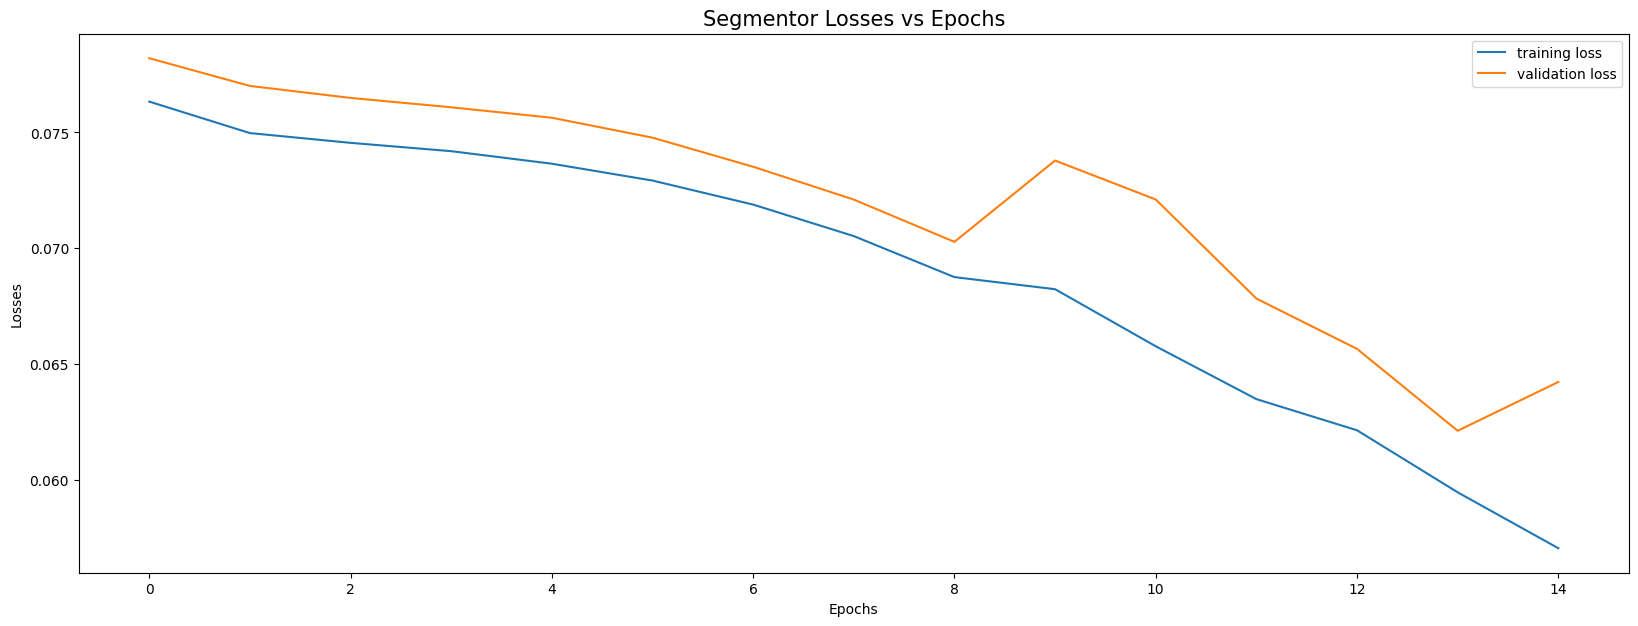

In [ ]:
# summarize history for loss
plt.figure(figsize = (20,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Segmentor Losses vs Epochs', fontsize = 15)
# save loss plot
plt.savefig('/content/gdrive/MyDrive/google colab/Breast_Ultrasound_Images_Dataset/plots/segmentor_loss_plot.png')

PREDIKCIJA

In [ ]:
loss = model.evaluate(X_test, y_test)
print('Model overall validation loss: ', loss)

2/2 [==============================] - 19s 3s/step - loss: 0.0642
Model overall validation loss:  0.06423257291316986


In [ ]:
y_pred = model.predict(X_test)

2/2 [==============================] - 18s 3s/step


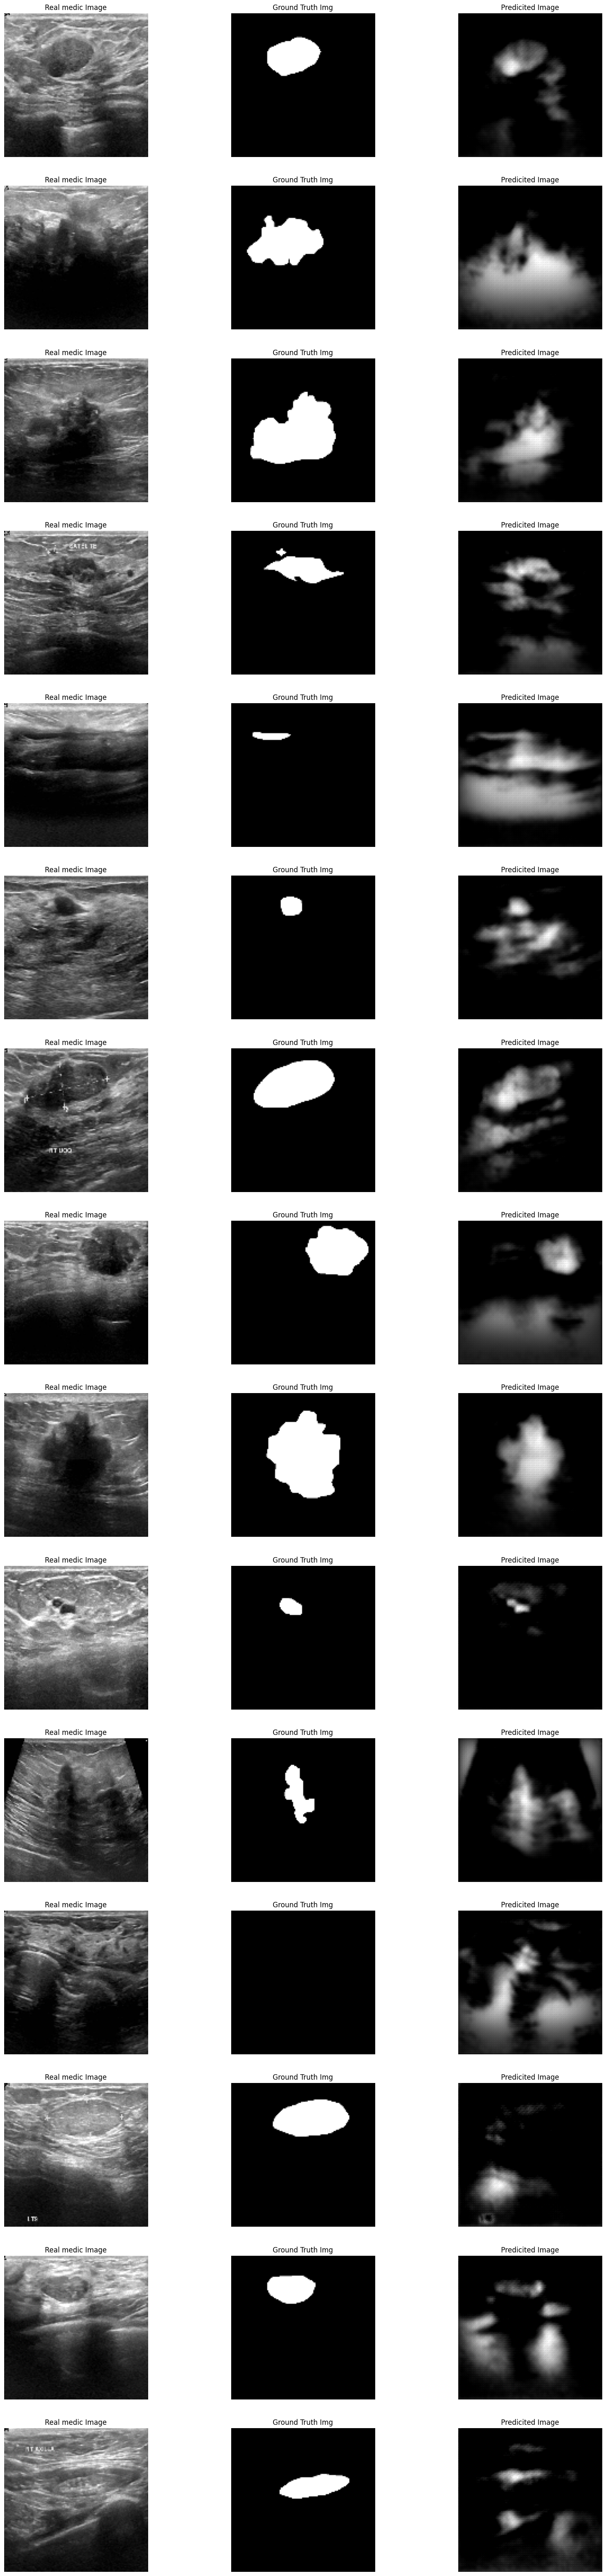

In [ ]:
plt.figure(figsize = (20,80))

i = 0
x = 0
while i < 45 :

    plt.subplot(15,3,i+1)
    plt.imshow(tf.squeeze(X_test[x]), 'gray')
    plt.title('Real medic Image')
    plt.axis('off')

    plt.subplot(15,3,i+2)
    plt.imshow(tf.squeeze(y_test[x]), 'gray')
    plt.title('Ground Truth Img')
    plt.axis('off')

    plt.subplot(15,3,i+3)
    plt.imshow(tf.squeeze(y_pred[x]), 'gray')
    plt.title('Predicited Image')
    plt.axis('off')

    x += 1
    i += 3
plt.show()

In [ ]:
model.save('/content/gdrive/MyDrive/google colab/Breast_Ultrasound_Images_Dataset/breast_segmentor_unet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
